           date ticker  adj_close
None                             
0    2016-12-30    WMT  67.742045
1    2016-12-29    WMT  67.879254
2    2016-12-28    WMT  67.928257
3    2016-12-27    WMT  68.310482
4    2016-12-23    WMT  68.153672
    Returns  Volatility  AAPL Weight  F Weight  WMT Weight  GE Weight  \
0  0.155738    0.209146     0.453880  0.045371    0.139172   0.309683   
1  0.113034    0.166792     0.402319  0.152328    0.231304   0.106464   
2  0.093438    0.158839     0.299072  0.203076    0.225344   0.103854   
3  0.099734    0.180363     0.250581  0.197930    0.069042   0.248886   
4  0.085543    0.163725     0.204628  0.128782    0.113490   0.196240   

   TSLA Weight  
0     0.051894  
1     0.107585  
2     0.168653  
3     0.233561  
4     0.356861  


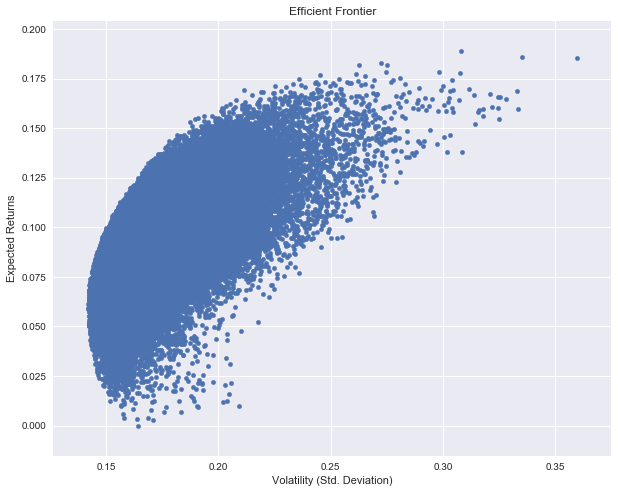

In [15]:
# import needed modules
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get adjusted closing prices of 5 selected companies with Quandl
quandl.ApiConfig.api_key = 'A8BpCv2VfEsrNYoveXvF'
selected = ['AAPL', 'F', 'WMT', 'GE', 'TSLA']
data = quandl.get_table('WIKI/PRICES', ticker = selected,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2014-1-1', 'lte': '2016-12-31' }, paginate=True)


print(data.head())

# reorganise data pulled by setting date as index with
# columns of tickers and their corresponding adjusted prices
clean = data.set_index('date')
table = clean.pivot(columns='ticker')

# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = len(selected)
num_portfolios = 50000

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(selected):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility'] + [stock+' Weight' for stock in selected]

# reorder dataframe columns
df = df[column_order]

print(df.head())

# plot the efficient frontier with a scatter plot
plt.style.use('seaborn')
df.plot.scatter(x='Volatility', y='Returns', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [1]:
# import needed modules
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get adjusted closing prices of 5 selected companies with Quandl
quandl.ApiConfig.api_key = 'A8BpCv2VfEsrNYoveXvF'

data1 = quandl.get('EURONEXT/ACCEL', start_date='2010-06-26', end_date='2018-03-27', column_index='4')
data1['ticker'] = 'ACCEL'
data2 = quandl.get('EURONEXT/AD', start_date='2010-06-26', end_date='2018-03-27')
data2['ticker'] = 'AD'
data3 = quandl.get('EURONEXT/AKZA', start_date='2010-06-26', end_date='2018-03-27')
data3['ticker'] = 'AKZA'
data4 = quandl.get('EURONEXT/ATCB', start_date='2010-06-26', end_date='2018-03-27')
data4['ticker'] = 'ATCB'
data5 = quandl.get('EURONEXT/ACOMO', start_date='2010-06-26', end_date='2018-03-27')
data5['ticker'] = 'ACOMO'
data6 = quandl.get('EURONEXT/FAGR', start_date='2010-06-26', end_date='2018-03-27')
data6['ticker'] = 'FAGR'
data7 = quandl.get('EURONEXT/RAND', start_date='2010-06-26', end_date='2018-03-27')
data7['ticker'] = 'RAND'
data8 = quandl.get('EURONEXT/SBMO', start_date='2010-06-26', end_date='2018-03-27')
data8['ticker'] = 'SBMO'
data10 = quandl.get('EURONEXT/URW', start_date='2010-06-26', end_date='2018-03-27')
data10['ticker'] = 'URW'
data11 = quandl.get('EURONEXT/HEIA', start_date='2010-06-26', end_date='2018-03-27')
data11['ticker'] = 'HEIA'
data12 = quandl.get('EURONEXT/ASML', start_date='2010-06-26', end_date='2018-03-27')
data12['ticker'] = 'ASML'
data13 = quandl.get('EURONEXT/DSM', start_date='2010-06-26', end_date='2018-03-27')
data13['ticker'] = 'DSM'
data14 = quandl.get('EURONEXT/PHIA', start_date='2010-06-26', end_date='2018-03-27')
data14['ticker'] = 'PHIA'
data15 = quandl.get('EURONEXT/UNA', start_date='2010-06-26', end_date='2018-03-27')
data15['ticker'] = 'UNA'
data16 = quandl.get('EURONEXT/ATC', start_date='2010-06-26', end_date='2018-03-27')
data16['ticker'] = 'ATC'
data17 = quandl.get('EURONEXT/RDSA', start_date='2010-06-26', end_date='2018-03-27')
data17['ticker'] = 'RDSA'
data18 = quandl.get('EURONEXT/URW', start_date='2010-06-26', end_date='2018-03-27')
data18['ticker'] = 'URW'
data_euro = pd.concat([data1,data2,data3,data4,data5,data6,data7,data8,data10,data11,data12,data13,data14,data15,data16,data17,data18])
selected = ['AAPL', 'BRK_B', 'GILD', 'MSFT']
data = quandl.get_table('WIKI/PRICES', ticker = selected,
                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
                        date = { 'gte': '2010-06-26', 'lte': '2018-03-27' }, paginate=True)

data_euro = data_euro.drop(['High','Low','Open','Turnover','Volume'], axis=1)
#ata_euro['date'] = data_euro.index
data_euro.reset_index(level=0, inplace=True)
data_euro =data_euro.rename(index=str, columns={"Last": "adj_close"})
data_euro =data_euro.rename(index=str, columns={"Date": "date"})
print(data_euro.head())

print(data.head())

data = pd.concat([data_euro,data])
data = data.reset_index(drop=True)

# EURONEXT/ADYEN WIKI/PRICES
# reorganise data pulled by setting date as index with
# columns of tickers and their corresponding adjusted prices
clean = data.set_index('date')
table = clean.pivot(columns='ticker')
table= table.dropna()

# calculate daily and annual returns of the stocks
returns_daily = table.pct_change()
returns_annual = returns_daily.mean() * 250

# get daily and covariance of returns of the stock
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

# empty lists to store returns, volatility and weights of imiginary portfolios
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []

# set the number of combinations for imaginary portfolios
num_assets = 19
num_portfolios = 50000

#set random seed for reproduction's sake
np.random.seed(101)

# populate the empty lists with each portfolios returns,risk and weights
for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(volatility)
    stock_weights.append(weights)

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(data['ticker'].unique().tolist()):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)

# get better labels for desired arrangement of columns
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in data['ticker'].unique().tolist()]

# reorder dataframe columns
df = df[column_order]


# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

        date  adj_close ticker
0 2014-02-14      14.00  ACCEL
1 2014-02-17      14.25  ACCEL
2 2014-02-18      14.20  ACCEL
3 2014-02-19      14.19  ACCEL
4 2014-02-20      14.11  ACCEL
           date ticker  adj_close
None                             
0    2018-03-27   MSFT      89.47
1    2018-03-26   MSFT      93.78
2    2018-03-23   MSFT      87.18
3    2018-03-22   MSFT      89.79
4    2018-03-21   MSFT      92.48


<Figure size 1000x800 with 2 Axes>

In [111]:
#data1.sort_values('Date')
#print(table)
print(data_euro['ticker'].unique().tolist())

data1 = quandl.get('EURONEXT/ACCEL', start_date='2016-06-26', end_date='2018-03-27', column_index='4')
data1['ticker'] = 'ACCEL'
data2 = quandl.get('EURONEXT/AD', start_date='2016-06-26', end_date='2018-03-27')
data2['ticker'] = 'AD'
data3 = quandl.get('EURONEXT/AKZA', start_date='2016-06-26', end_date='2018-03-27')
data3['ticker'] = 'AKZA'
data4 = quandl.get('EURONEXT/ATCB', start_date='2016-06-26', end_date='2018-03-27')
data4['ticker'] = 'ATCB'
data5 = quandl.get('EURONEXT/ACOMO', start_date='2016-06-26', end_date='2018-03-27')
data5['ticker'] = 'ACOMO'
data6 = quandl.get('EURONEXT/FAGR', start_date='2016-06-26', end_date='2018-03-27')
data6['ticker'] = 'FAGR'
data7 = quandl.get('EURONEXT/RAND', start_date='2016-06-26', end_date='2018-03-27')
data7['ticker'] = 'RAND'
data8 = quandl.get('EURONEXT/SBMO', start_date='2016-06-26', end_date='2018-03-27')
data8['ticker'] = 'SBMO'
data10 = quandl.get('EURONEXT/URW', start_date='2016-06-26', end_date='2018-03-27')
data10['ticker'] = 'URW'
data11 = quandl.get('EURONEXT/HEIA', start_date='2016-06-26', end_date='2018-03-27')
data11['ticker'] = 'HEIA'
data12 = quandl.get('EURONEXT/ASML', start_date='2016-06-26', end_date='2018-03-27')
data12['ticker'] = 'ASML'
data13 = quandl.get('EURONEXT/DSM', start_date='2016-06-26', end_date='2018-03-27')
data13['ticker'] = 'DSM'
data14 = quandl.get('EURONEXT/PHIA', start_date='2016-06-26', end_date='2018-03-27')
data14['ticker'] = 'PHIA'
data15 = quandl.get('EURONEXT/UNA', start_date='2016-06-26', end_date='2018-03-27')
data15['ticker'] = 'UNA'
data16 = quandl.get('EURONEXT/ATC', start_date='2016-06-26', end_date='2018-03-27')
data16['ticker'] = 'ATC'
data17 = quandl.get('EURONEXT/RDSA', start_date='2016-06-26', end_date='2018-03-27')
data17['ticker'] = 'RDSA'


['ACCEL', 'AD', 'AKZA', 'ATCB', 'ACOMO', 'FAGR', 'RAND', 'SBMO', 'HEIA', 'ASML', 'DSM', 'PHIA', 'UNA', 'ATC', 'RDSA']


In [92]:
for counter,symbol in enumerate(data['ticker'].unique().tolist()):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]

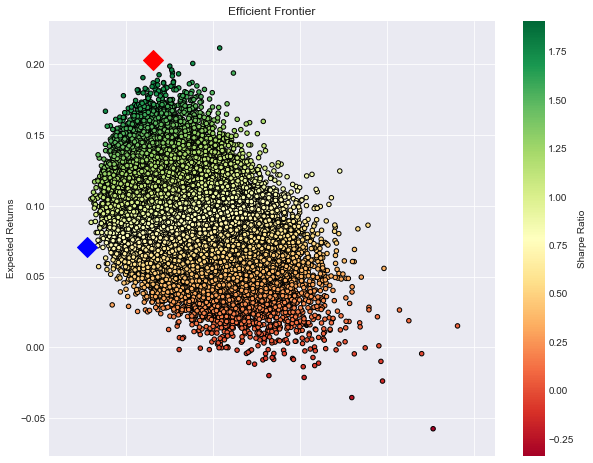

In [2]:
min_volatility = df['Volatility'].min()
max_sharpe = df['Sharpe Ratio'].max()

# use the min, max values to locate and create the two special portfolios
sharpe_portfolio = df.loc[df['Sharpe Ratio'] == max_sharpe]
min_variance_port = df.loc[df['Volatility'] == min_volatility]

# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatility', y='Returns', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatility'], y=sharpe_portfolio['Returns'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatility'], y=min_variance_port['Returns'], c='blue', marker='D', s=200 )
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Returns')
plt.title('Efficient Frontier')
plt.show()

In [3]:
print(min_variance_port.T)
print(sharpe_portfolio.T)

                 29033
Returns       0.071105
Volatility    0.090886
Sharpe Ratio  0.782359
ACCEL Weight  0.081670
AD Weight     0.068451
AKZA Weight   0.095704
ATCB Weight   0.097705
ACOMO Weight  0.034941
FAGR Weight   0.023101
RAND Weight   0.000912
SBMO Weight   0.020114
HEIA Weight   0.034710
ASML Weight   0.041368
DSM Weight    0.014118
PHIA Weight   0.092522
UNA Weight    0.100707
ATC Weight    0.041876
RDSA Weight   0.021094
MSFT Weight   0.026637
GILD Weight   0.101052
BRK_B Weight  0.020142
AAPL Weight   0.083174
                 26227
Returns       0.202633
Volatility    0.106217
Sharpe Ratio  1.907716
ACCEL Weight  0.092576
AD Weight     0.029699
AKZA Weight   0.003059
ATCB Weight   0.009254
ACOMO Weight  0.100864
FAGR Weight   0.111870
RAND Weight   0.013159
SBMO Weight   0.007231
HEIA Weight   0.087349
ASML Weight   0.121413
DSM Weight    0.048544
PHIA Weight   0.002449
UNA Weight    0.041753
ATC Weight    0.080405
RDSA Weight   0.110917
MSFT Weight   0.031561
GILD Weight

In [20]:
quandl.ApiConfig.api_key = 'A8BpCv2VfEsrNYoveXvF'
quandl.get('EURONEXT/ACCEL', start_date='2016-06-26', end_date='2019-06-28')

,Open,High,Low,Last,Volume,Turnover
Date,,,,,,
2016-06-27,18.900,18.900,18.020,18.020,66419.0,1.223155e+06
2016-06-28,18.300,18.550,18.020,18.020,35196.0,6.420979e+05
2016-06-29,18.105,18.675,18.105,18.530,27632.0,5.105822e+05
2016-06-30,18.500,18.780,18.500,18.595,17412.0,3.248556e+05
2016-07-01,18.790,18.835,18.530,18.835,19359.0,3.627725e+05
2016-07-04,18.820,19.185,18.820,19.150,25754.0,4.911526e+05
2016-07-05,19.050,19.145,18.690,18.765,24873.0,4.710340e+05
2016-07-06,19.090,19.090,18.600,18.710,28613.0,5.370012e+05
2016-07-07,18.750,19.130,18.665,18.770,24868.0,4.680987e+05
